# Introduction to STEM-EDX Analysis Using Hyperspy

This is a brief introduction to using the STEM-EDX analysis tools in Hyperspy. We will cover extracting elemental images and quantifying the composition of a specific region of an image.

The example dataset here is a STEM-EDX spectrum image of SiO2 particles.

# 1. Loading and Viewing Data

Import Hyperspy.

In [2]:
import hyperspy.api as hs
%matplotlib nbagg

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


Load both the ADF image and the spectrum image.

In [3]:
adf_filename = "/home/qzo13262/SiO2 HAADF Image.hspy"
si_filename = "/home/qzo13262/SiO2 EDS Spectrum Image.hspy"
adf = hs.load(adf_filename)
si = hs.load(si_filename)

/home/qzo13262/.local/lib/python3.7/site-packages/hyperspy/misc/utils.py:496: VisibleDeprecationWarning: Use of the `binned` attribute in metadata is going to be deprecated in v2.0. Set the `axis.is_binned` attribute instead. 
  VisibleDeprecationWarning)
/home/qzo13262/.local/lib/python3.7/site-packages/hyperspy/io.py:519: VisibleDeprecationWarning: Loading old file version. The binned attribute has been moved from metadata.Signal to axis.is_binned. Setting this attribute for all signal axes instead.
  'signal axes instead.', VisibleDeprecationWarning)


Initial plotting of the spectrum image data show a summed intensity for the navigator and the spectrum from an individual pixel as the signal.

<IPython.core.display.Javascript object>


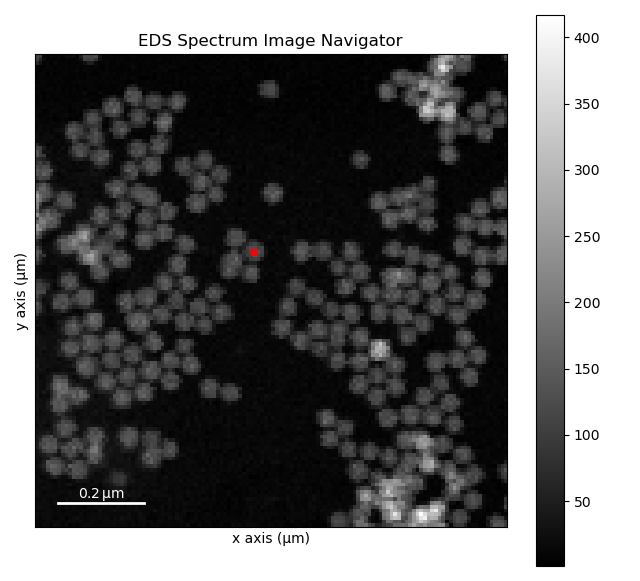

<IPython.core.display.Javascript object>


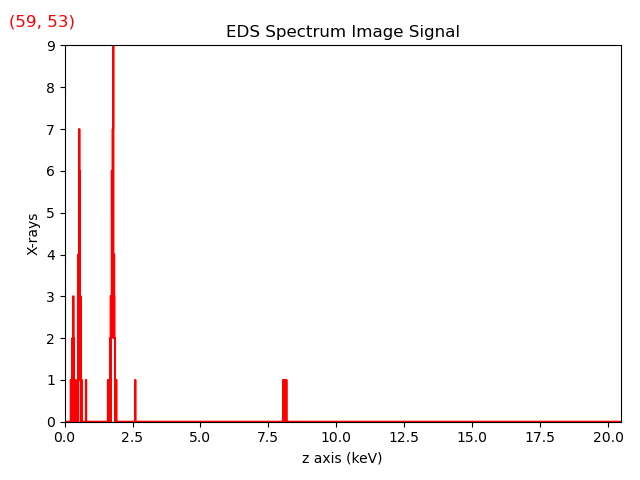

In [4]:
si.plot()

We can view the summed spectrum by switching the navigation and signal axes or by simply summing over the navigation axes.

<IPython.core.display.Javascript object>


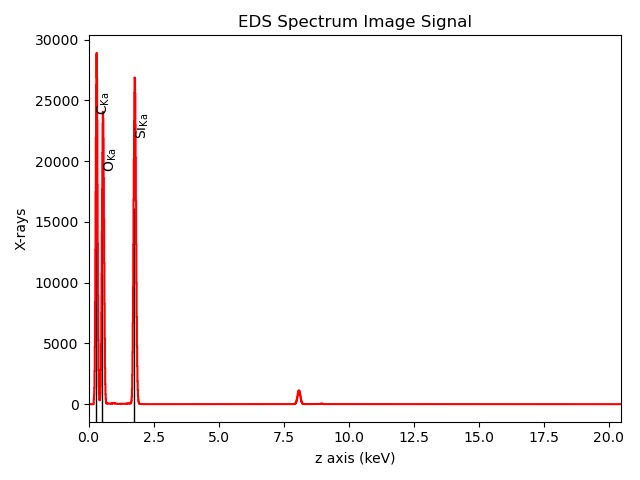

In [11]:
si.sum().plot(True)

# 2. Extracting Elemental Maps

In order to extract elemental maps we need to first check / set a number of parameters. Let's take a look at what's already contained in our Hyperspy signal metadata.

In [6]:
si.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 0.0
│       │   ├── tilt_beta = 0.019999999552965164
│       │   ├── x = -0.3854571875
│       │   ├── y = -0.29087359375
│       │   └── z = 0.00339160009765625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.77
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 80000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2019-09-08
│   ├── original_filename = SiO2 EDS Spectrum Image.dm4
│   ├── time = 14:19:17
│   └── title = EDS Spectrum Image
├── Sample
│   └── description = E7_RFX8
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays
    └── signal_type = EDS_TEM

In order to map any elements we first need to set those elements within the data.

In [16]:
si.set_elements(['Si','O','Cu'])

Checking the metadata again we can see that those elements have been added.

In [19]:
si.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 0.0
│       │   ├── tilt_beta = 0.019999999552965164
│       │   ├── x = -0.3854571875
│       │   ├── y = -0.29087359375
│       │   └── z = 0.00339160009765625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.77
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 80000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2019-09-08
│   ├── original_filename = SiO2 EDS Spectrum Image.dm4
│   ├── time = 14:19:17
│   └── title = EDS Spectrum Image
├── Sample
│   ├── description = E7_RFX8
│   ├── elements = ['C', 'Cu', 'O', 'Si']
│   └── xray_lines = ['C_Ka', 'Cu_Ka', 'O_Ka', 'Si_Ka']
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays
    └── signal_type = EDS_TEM

Additionally, you have to assign the specific X-ray peaks for each element. If you've already set the elements you can do this using the add_lines() function.

In [21]:
si.add_lines()

The add_lines() function with no arguments will add only one peak per element (the highest energy alpha peak within the energy range or below an overvoltage of 2). We can add any others manually.

In [ ]:
si.add_lines(['Cu_Kb'])

In [22]:
si.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 0.0
│       │   ├── tilt_beta = 0.019999999552965164
│       │   ├── x = -0.3854571875
│       │   ├── y = -0.29087359375
│       │   └── z = 0.00339160009765625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.77
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 80000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2019-09-08
│   ├── original_filename = SiO2 EDS Spectrum Image.dm4
│   ├── time = 14:19:17
│   └── title = EDS Spectrum Image
├── Sample
│   ├── description = E7_RFX8
│   ├── elements = ['C', 'Cu', 'O', 'Si']
│   └── xray_lines = ['C_Ka', 'Cu_Ka', 'Cu_Kb', 'O_Ka', 'Si_Ka']
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays
    └── signal_type = EDS_TEM

To visualize the lines you have just added you can plot the sum spectrum with the added lines.

<IPython.core.display.Javascript object>


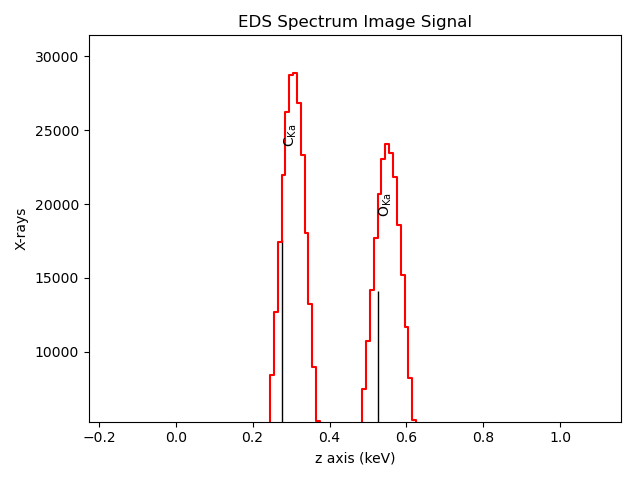

In [23]:
si.sum().plot(True)

If unknown peaks appear in your spectrum you can identify them based on energy using the get_xray_lines_near_energy() function.

In [24]:
hs.eds.get_xray_lines_near_energy(0.307, only_lines=['a','b'])

['C_Ka', 'Ca_La', 'N_Ka', 'Sc_La']

In [25]:
si.add_lines(['C_Ka'])

<IPython.core.display.Javascript object>


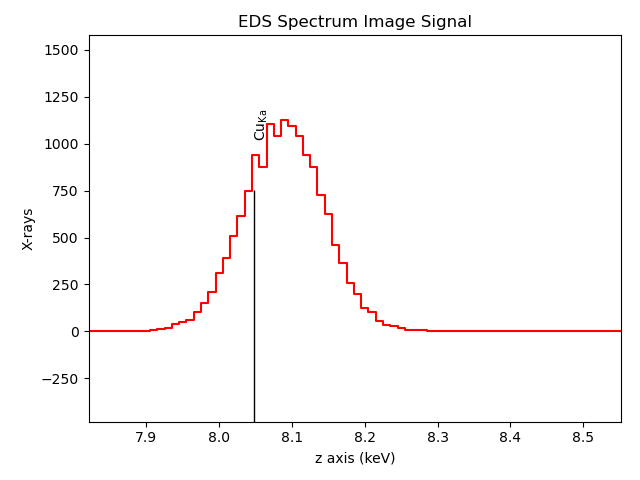

In [26]:
si.sum().plot(True)

One additional problem is that the offset of the energy axis is slightly off. If you didn't correct for this at the microscope you can do it now.

In [27]:
si.axes_manager[-1].offset = -0.035

<IPython.core.display.Javascript object>


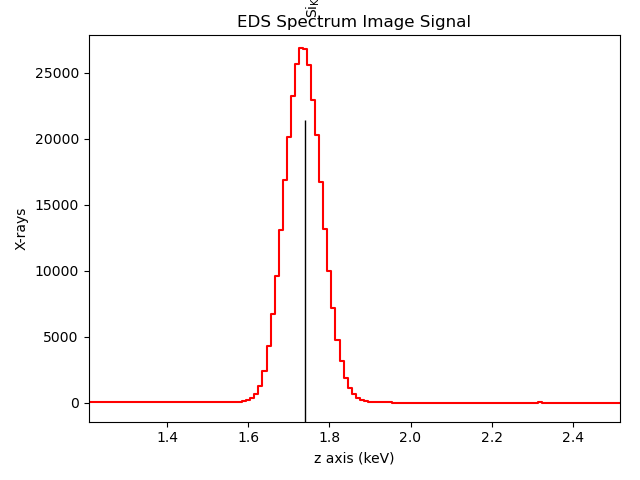

In [28]:
si.sum().plot(True)

Once you have set all of the elements you would like to map and made sure that they're in the right place on the energy axis you can plot the elemental maps.

<IPython.core.display.Javascript object>


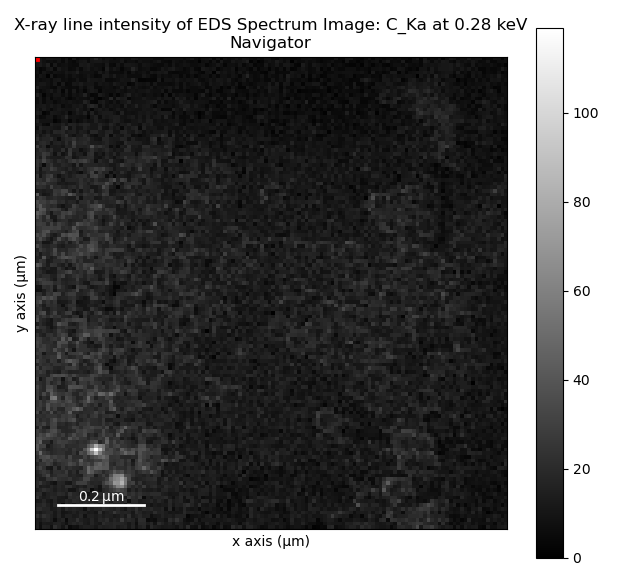

<IPython.core.display.Javascript object>


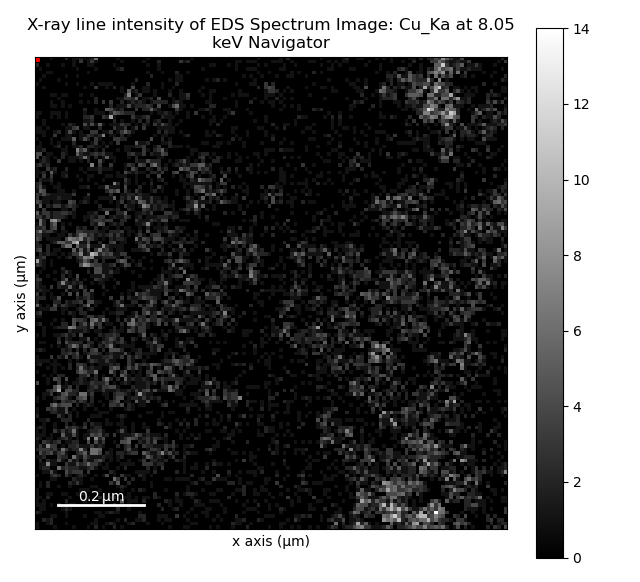

<IPython.core.display.Javascript object>


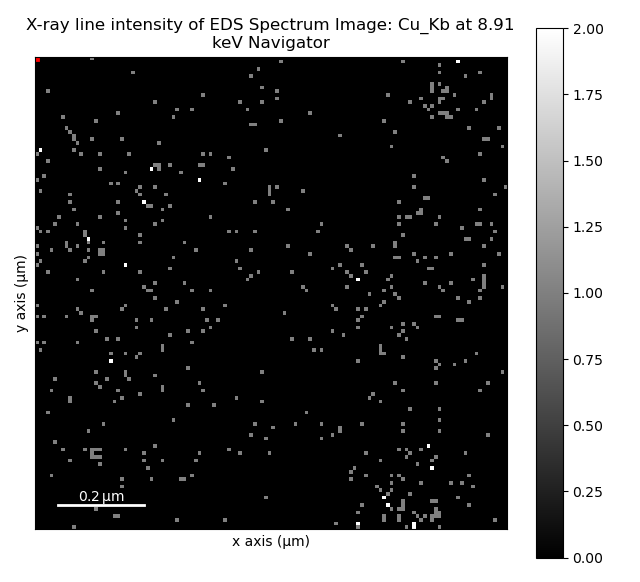

<IPython.core.display.Javascript object>


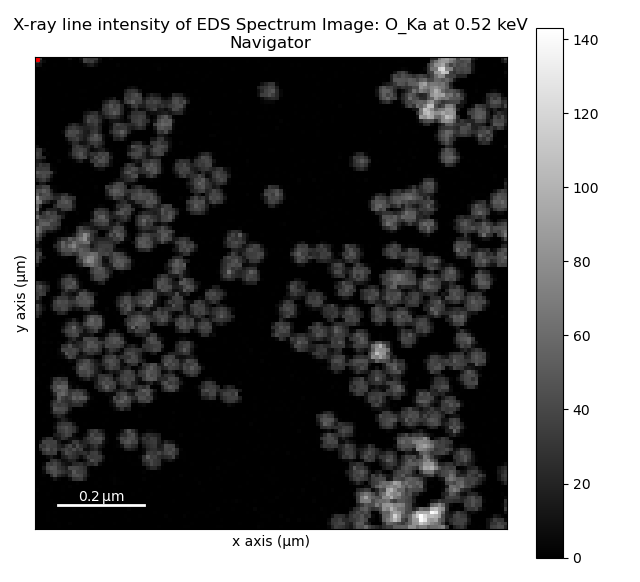

<IPython.core.display.Javascript object>


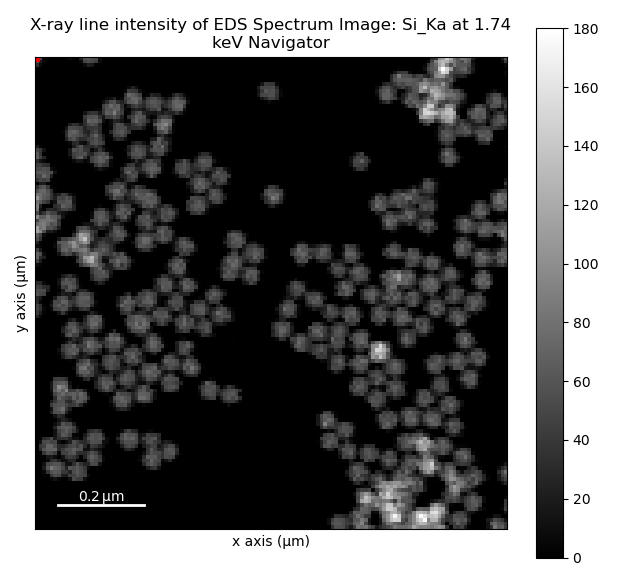

[<BaseSignal, title: X-ray line intensity of EDS Spectrum Image: C_Ka at 0.28 keV, dimensions: (128, 128|)>,
 <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: Cu_Ka at 8.05 keV, dimensions: (128, 128|)>,
 <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: Cu_Kb at 8.91 keV, dimensions: (128, 128|)>,
 <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: O_Ka at 0.52 keV, dimensions: (128, 128|)>,
 <BaseSignal, title: X-ray line intensity of EDS Spectrum Image: Si_Ka at 1.74 keV, dimensions: (128, 128|)>]

In [29]:
si.get_lines_intensity(plot_result=True)

<IPython.core.display.Javascript object>


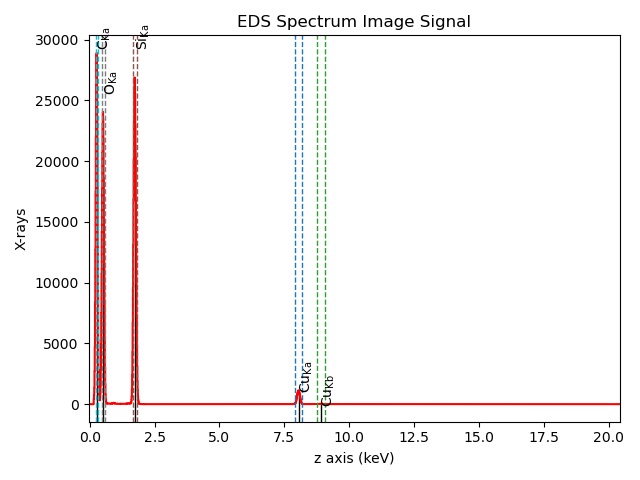

In [30]:
si.sum().plot(integration_windows='auto')

# 3. Quantification

For quantification we need to extract the intensities under the peaks. This means we need to subtract the background signal. There are two main methods for doing this:

1. Define background windows set the background signal above and below the peak.

2. Model and fit the spectrum including the background.

1. Using background windows.

In [31]:
bw = si.sum().estimate_background_windows()

<IPython.core.display.Javascript object>


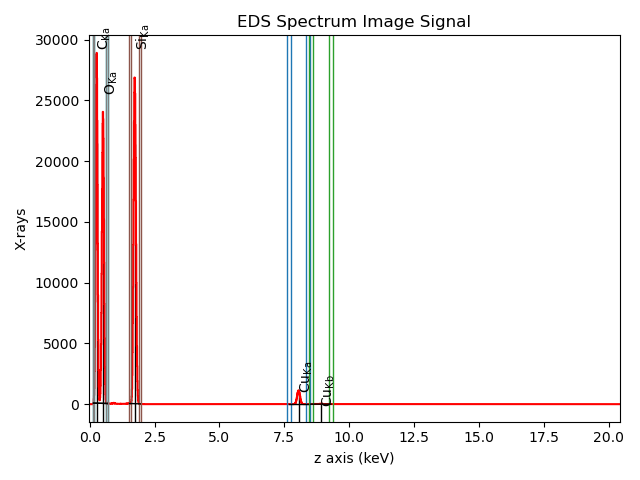

In [32]:
si.sum().plot(background_windows=bw)

In [33]:
s_int_bw = si.sum().get_lines_intensity(background_windows=bw)

2. Fitting a model

In [34]:
m = si.sum().create_model()

In [35]:
m.fit()

   covar: array([[ 2.54328017e+02, -2.85652717e+02,  1.02552905e+02,
        -1.65033991e+01,  1.32030650e+00, -5.13429591e-02,
         7.73741464e-04, -1.46728616e+01, -2.43316321e+00,
        -7.10851789e+00, -1.15564418e+01,  9.81290403e-01],
       [-2.85652717e+02,  4.43667063e+02, -1.82319466e+02,
         3.16114682e+01, -2.65173914e+00,  1.06559566e-01,
        -1.64501151e-03,  1.41387118e+01,  4.26193557e+00,
         9.90423593e-01,  8.74813005e+00, -9.68574149e+00],
       [ 1.02552905e+02, -1.82319466e+02,  8.03035882e+01,
        -1.45390628e+01,  1.25642567e+00, -5.15986117e-02,
         8.09879145e-04, -4.64964109e+00, -1.33133259e+00,
         8.07128988e-01, -2.39330605e+00,  4.63288010e+00],
       [-1.65033991e+01,  3.16114682e+01, -1.45390628e+01,
         2.71098209e+00, -2.39359021e-01,  9.99211149e-03,
        -1.58868219e-04,  7.07058824e-01,  8.63845603e-02,
        -2.34985621e-01,  3.14485616e-01, -8.32060216e-01],
       [ 1.32030650e+00, -2.65173914e+00, 

In [36]:
m.fit_background()

In [37]:
m.calibrate_energy_axis(calibrate='resolution')

<IPython.core.display.Javascript object>


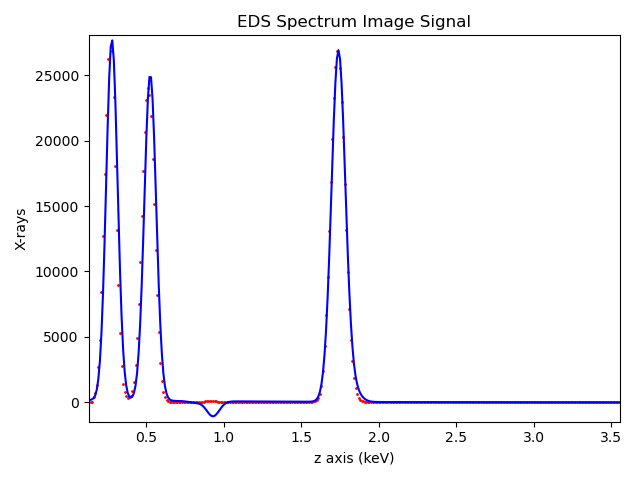

In [38]:
m.plot()

In [39]:
s_int_fit = m.get_lines_intensity()

Now we have the intensity under the peaks we can use one of the quantification methods discussed previously. For Cliff-Lorimer, k-factors for both ePSIC microscopes at the highest accelerating voltages can be found at https://confluence.diamond.ac.uk/display/EPSICWEB/Calibrations.

In [42]:
kfactors = [1.3,1.0]

In [41]:
si.set_elements(['O','Si'])
si.set_lines(['O_Ka','Si_Ka'])

In [45]:
composition_bw = si.sum().quantification([s_int_bw[3],s_int_bw[4]],method='CL',factors=kfactors)
composition_fit = si.sum().quantification([s_int_fit[3],s_int_fit[4]],method='CL',factors=kfactors)

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


In [46]:
print('             |-----------------------------|')
print('             |     Atomic compositions     |')
print('             |-----------------------------|')

print(' \t     |    Bg sub   |     Fitted    |')
print('|------------|-------------|---------------|')
print('| O  (at. %) |     {:.3}]    |      {:.3}]     |'.format(str(composition_bw[0].data), str(composition_fit[0].data)))
print('| Si (at. %) |     {:.3}]    |      {:.3}]     |'.format(str(composition_bw[1].data), str(composition_fit[1].data)))
print('|------------|-------------|---------------|')


             |-----------------------------|
             |     Atomic compositions     |
             |-----------------------------|
 	     |    Bg sub   |     Fitted    |
|------------|-------------|---------------|
| O  (at. %) |     [61]    |      [64]     |
| Si (at. %) |     [38]    |      [35]     |
|------------|-------------|---------------|


In [48]:
si.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 40.0
│       │       └── energy_resolution_MnKa = 130.0
│       ├── Stage
│       │   ├── tilt_alpha = 0.0
│       │   ├── tilt_beta = 0.019999999552965164
│       │   ├── x = -0.3854571875
│       │   ├── y = -0.29087359375
│       │   └── z = 0.00339160009765625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.77
│       ├── beam_energy = 200.0
│       ├── camera_length = 30.0
│       ├── magnification = 80000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2019-09-08
│   ├── original_filename = SiO2 EDS Spectrum Image.dm4
│   ├── time = 14:19:17
│   └── title = EDS Spectrum Image
├── Sample
│   ├── description = E7_RFX8
│   ├── elements = ['O', 'Si']
│   └── xray_lines = ['O_Ka', 'Si_Ka']
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = X-rays
    └── signal_type = EDS_TEM

In [49]:
si.set_microscope_parameters(beam_current=0.1)
si.set_microscope_parameters(live_time=0.005)

In [50]:
zfactors = [1.3,1.0]

In [52]:
composition_zfactors = si.sum().quantification([s_int_fit[3],s_int_fit[4]],method='zeta',factors=zfactors)

[########################################] | 100% Completed |  0.1s


In [56]:
composition_zfactors

([<BaseSignal, title: atomic percent of O, dimensions: (1|)>,
  <BaseSignal, title: atomic percent of Si, dimensions: (1|)>],
 <BaseSignal, title: Mass thickness, dimensions: (1|)>)

In [57]:
m = si.create_model()

In [58]:
m.fit()

   covar: array([[ 2.26104459e+02, -2.61925198e+02,  9.54634988e+01,
        -1.55066744e+01,  1.24856969e+00, -4.87822066e-02,
         7.37788999e-04, -9.99789038e+00,  1.44639964e+00],
       [-2.61925198e+02,  4.20549771e+02, -1.74744990e+02,
         3.04814175e+01, -2.56695642e+00,  1.03437396e-01,
        -1.60008789e-03,  7.54939402e+00, -9.83467124e+00],
       [ 9.54634988e+01, -1.74744990e+02,  7.76928219e+01,
        -1.41360778e+01,  1.22540726e+00, -5.04327593e-02,
         7.92819085e-04, -2.05848583e+00,  4.62733584e+00],
       [-1.55066744e+01,  3.04814175e+01, -1.41360778e+01,
         2.64694906e+00, -2.34304175e-01,  9.79793965e-03,
        -1.55973390e-04,  2.69652928e-01, -8.26640124e-01],
       [ 1.24856969e+00, -2.56695642e+00,  1.22540726e+00,
        -2.34304175e-01,  2.10728359e-02, -8.92313502e-04,
         1.43492800e-05, -1.83472907e-02,  6.96332704e-02],
       [-4.87822066e-02,  1.03437396e-01, -5.04327593e-02,
         9.79793965e-03, -8.92313502e-04,

In [59]:
m.fit_background()

<IPython.core.display.Javascript object>


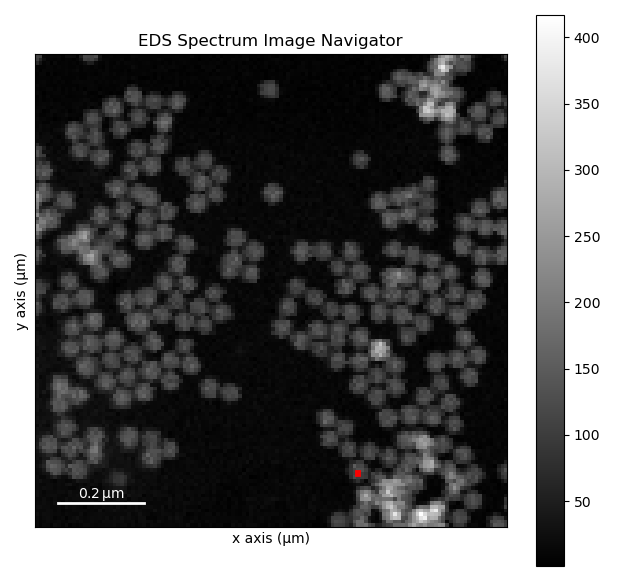

<IPython.core.display.Javascript object>


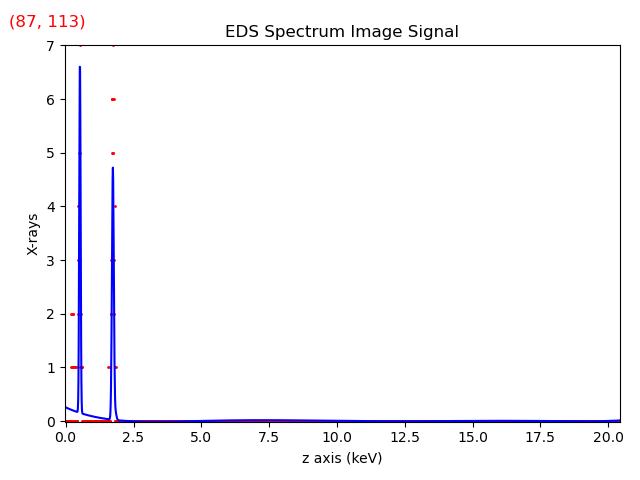

In [60]:
m.plot()